In [271]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.stats as st
import numpy as np

In [272]:
GamingData = "GamingStudy_Data.csv"

dataset=pd.read_csv(GamingData, encoding="ISO-8859-1")

dataset.columns



Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

In [280]:
Residents=dataset[["Residence"]]
Residents

topsixco=Residents.value_counts().nlargest(6)
topsixco

Residence  
USA            4569
Germany        1413
UK             1032
Canada          994
Netherlands     506
France          391
dtype: int64

In [273]:

ply_gen_res = dataset[["Gender", "Residence", "Playstyle"]]
top_six = ply_gen_res[ply_gen_res["Residence"].isin(["USA", "Germany", "UK", "Canada", "Netherlands", "France"])]
male = top_six[top_six["Gender"].isin(["Male"])]
female = top_six[top_six["Gender"].isin(["Female"])]
other = top_six[top_six["Gender"].isin(["Other"])]

top_six


,Gender,Residence,Playstyle
0,Male,USA,Singleplayer
1,Male,USA,Multiplayer - online - with strangers
2,Female,Germany,Singleplayer
3,Male,USA,Multiplayer - online - with online acquaintanc...
5,Male,USA,Multiplayer - online - with real life friends
...,...,...,...
13458,Male,USA,Multiplayer - online - with online acquaintanc...
13459,Male,France,Multiplayer - online - with strangers
13460,Female,USA,Multiplayer - online - with strangers
13462,Female,Canada,Singleplayer


In [274]:
breakdown = [["Male", totalMaleCount, mG_Percent, mSW_Percent, mSP_Percent], ["Female", totalFemaleCount, fG_Percent, fSW_Percent, fSP_Percent], ["Other", totalOtherCount, oG_Percent, oSW_Percent, oSP_Percent]]
columns = ['Gender', 'Count', 'GAD %', 'SWL %', 'SPIN %']
display_df = pd.DataFrame(breakdown, columns = columns)
display_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,12699,16.42,47.78,40.05
1,Female,713,34.08,53.16,64.10
2,Other,52,46.15,71.15,63.46


<AxesSubplot:ylabel='Gender'>

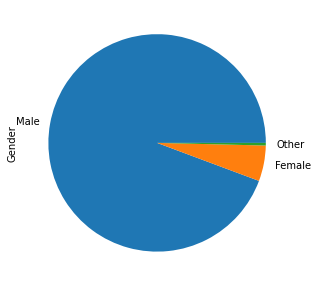

In [275]:
totalCount = len(gender['Gender'])
totalGenderCount = gender['Gender'].value_counts()
totalMaleCount = len(gender.loc[gender['Gender'] == "Male"])
totalFemaleCount = len(gender.loc[gender['Gender'] == "Female"])
totalOtherCount = len(gender.loc[gender['Gender'] == "Other"])

male = gender.loc[gender['Gender'] == "Male"]
female = gender.loc[gender['Gender'] == "Female"]
other = gender.loc[gender['Gender'] == "Other"]

gender_count=gender["Gender"].value_counts()
gender_count.plot(kind= "pie",figsize=(5,5))

In [276]:
ply_gen_res = dataset[["Gender", "Residence", "GAD_T", "SWL_T", "SPIN_T", "Playstyle"]]
top_six = ply_gen_res[ply_gen_res["Residence"].isin(["USA", "Germany", "UK", "Canada", "Netherlands", "France"])]
top_six

,Gender,Residence,GAD_T,SWL_T,SPIN_T,Playstyle
0,Male,USA,1,23,5.0,Singleplayer
1,Male,USA,8,16,33.0,Multiplayer - online - with strangers
2,Female,Germany,8,17,31.0,Singleplayer
3,Male,USA,0,17,11.0,Multiplayer - online - with online acquaintanc...
5,Male,USA,1,17,13.0,Multiplayer - online - with real life friends
...,...,...,...,...,...,...
13458,Male,USA,6,16,12.0,Multiplayer - online - with online acquaintanc...
13459,Male,France,4,28,7.0,Multiplayer - online - with strangers
13460,Female,USA,20,23,25.0,Multiplayer - online - with strangers
13462,Female,Canada,13,16,32.0,Singleplayer


In [277]:
playstyle= dataset["Playstyle"].str.lower().str.rstrip(' ')

playstyle_series=pd.value_counts(playstyle)
playstyle_mask=(playstyle_series/playstyle_series.sum()*100).lt(.05)

playstyle_total=playstyle_series[~playstyle_mask]
playstyle_total['other']=playstyle_series[playstyle_mask].sum()


<AxesSubplot:ylabel='Playstyle'>

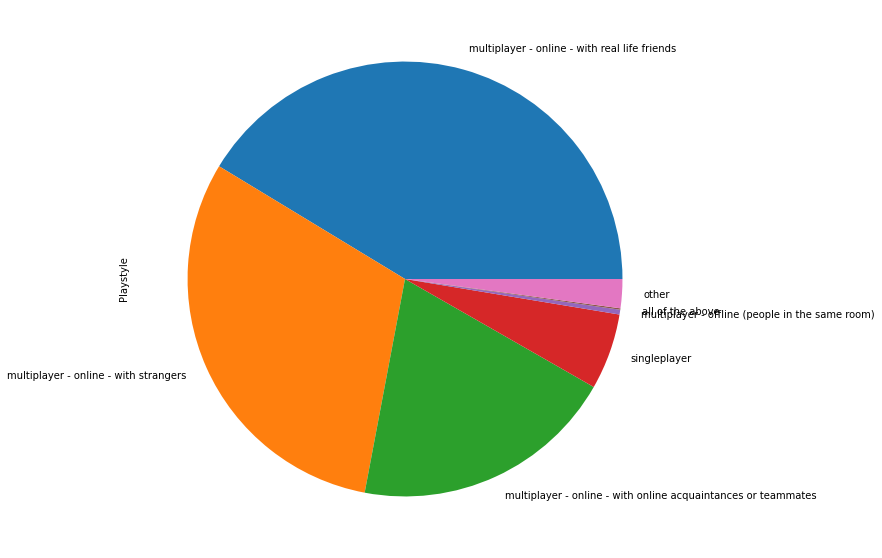

In [278]:
playstyle_total.plot(kind = "pie",figsize=(20,10))


<AxesSubplot:ylabel='Playstyle'>

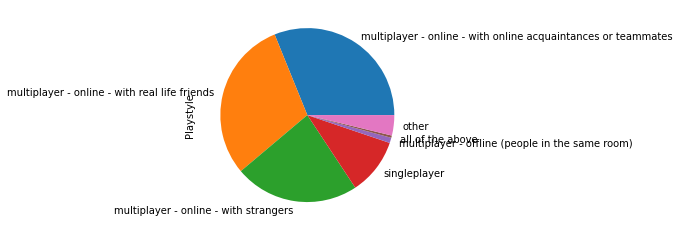

In [291]:
female_playstyle= female["Playstyle"].str.lower().str.rstrip(' ')
type(female_playstyle)

female_playstyle_count=pd.value_counts(female_playstyle)
female_playstyle_mask=(female_playstyle_count/female_playstyle_count.sum()*100).lt(.25)
#female_playstyle_mask
#female_playstyle_count

female_playstyle_total=female_playstyle_count[~female_playstyle_mask]
female_playstyle_total['other']=female_playstyle_count[female_playstyle_mask].sum()
female_playstyle_total.plot.pie()

<AxesSubplot:ylabel='Playstyle'>

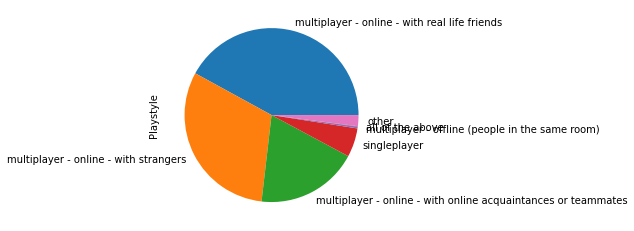

In [292]:
male_playstyle= male["Playstyle"].str.lower().str.rstrip(' ')
type(male_playstyle)

male_playstyle_count=pd.value_counts(male_playstyle)
male_playstyle_mask=(male_playstyle_count/male_playstyle_count.sum()*100).lt(.05)
male_playstyle_total=male_playstyle_count[~male_playstyle_mask]
male_playstyle_total['other']=male_playstyle_count[male_playstyle_mask].sum()
male_playstyle_total.plot.pie()

<AxesSubplot:ylabel='Playstyle'>

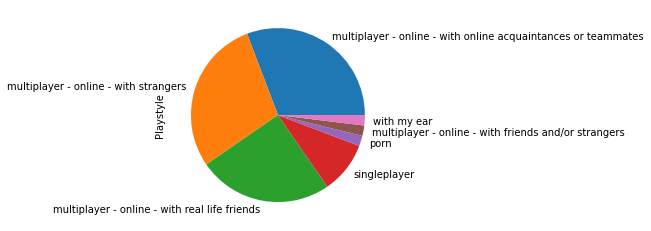

In [293]:
other_playstyle= other["Playstyle"].str.lower().str.rstrip(' ')
other_playstyle_count=pd.value_counts(other_playstyle)
other_playstyle_mask=(other_playstyle_count/other_playstyle_count.sum()*100).lt(.15)

other_playstyle_total=other_playstyle_count[~other_playstyle_mask]
other_playstyle_total['other']=other_playstyle_count[other_playstyle_mask].sum()
other_playstyle_total.plot.pie()

<AxesSubplot:ylabel='Playstyle'>

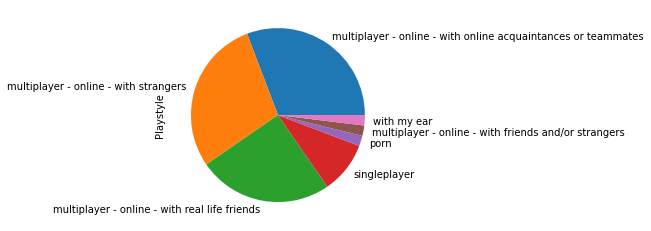

In [294]:
other_playstyle= other["Playstyle"].str.lower().str.rstrip(' ')
other_playstyle_count=pd.value_counts(other_playstyle)
other_playstyle_mask=(other_playstyle_count/other_playstyle_count.sum()*100).lt(.15)

other_playstyle_total=other_playstyle_count[~other_playstyle_mask]
other_playstyle_total['other']=other_playstyle_count[other_playstyle_mask].sum()
other_playstyle_total.plot.pie()